<a href="https://colab.research.google.com/github/marcosw1998/Data-Science/blob/main-igor/Notebook/covid_spends_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos custos do governo de Pernambuco - BR em relação à Covid-19**
* Projeto corresponde a entrega parcial para avaliação na cadeira eletiva IF697 - Intro. a Ciência dos Dados
* Autores: Igor Silva e Marcos Cavalcanti
* Conjunto de dados públicos retirados das seguintes fontes:
  * [Portal da Transparência TCU](http://www.portaltransparencia.gov.br/coronavirus)
  * [Prefeitura do Recife](http://dados.recife.pe.gov.br/dataset?tags=sa%C3%BAde)
  * [Brasil.io](https://brasil.io/dataset/covid19/caso_full/)



## **Por quê o tema?**

* Interesse em entender e expor de forma clara os gastos públicos
* Analisar distribuição de gastos
* Covis-19 é um tema importante e merece muita atenção, pois tem feito muitas vítimas e mudado a forma como a sociedade pensa e se organiza
* Entender a distribuição de gastos é uma boa forma de tentar corrigir erros e minimizar danos futuros na economia e na sociedade

## **Carregando as bibliotecas**

  * Utilizaremos a biblioteca ***`Pandas`*** para trabalhar sobre os dados  e a biblioteca ***`Numpy`*** para operações sobre os datasets.
  



In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

## **Carregando os dados**

  * Utilizaremos a lib ***`requests`*** para carregar os dados em formato csv e em seguida convertê-los em JSON
  * Referência: https://www.nylas.com/blog/use-python-requests-module-rest-apis/ 
  * Instalação, caso o python não tenha instalado nativamente:
     ```
      !pip install requests
      ```



In [46]:
# !pip install requests

### Portal da transparência

* O portal da transparência permite que sejam baixados apenas 1000 registros por vez, portanto decidimos por baixar 2 datasets diferentes e depois fazermos a junção. Os dados são referentes a algumas cidades de Pernambuco 
(Recife, Jaboatão, Olinda, Paulista, Caruaru, Garanhuns, Petrolina, Arcoverde, Serra Talhada, Buíque)

In [47]:
invest_covidPe = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/covid-pe.csv",encoding = "utf-8")
invest_covidPe2 = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/transferencias_coronavirus.csv",encoding = "utf-8")

In [48]:
#Validando os dados do dataset invest_covidPe
print('Dataset 1',invest_covidPe.shape)
invest_covidPe.sort_values("Município").head()

Dataset 1 (561, 12)


,Mês/Ano,Tipo,Tipo de Favorecido,UF,Nome do Favorecido,CPF/CNPJ,Município,Função,Programa Orçamentário,Ação Orçamentária,Linguagem Cidadã,Valor Transferido
182,nov/20,Legais. Voluntárias e Específicas,Fundo Público,PE,FUNDO MUNICIPAL DE SAUDE,11.371.082/0001-05,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,Sem informação,486.515.00
178,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,ASSOCICAO DE PAIS E MESTRES,11.252.224/0001-07,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,7.897.02
179,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CONSELHO ESCOLAR MARIA DO SOCORRO DE FREITAS,02.021.769/0001-11,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,2.837.48
87,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CONSELHO ESCOLAR DOM BERNARDINO MARCHIO,34.179.420/0001-07,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,8.427.56
181,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,UNIDADE EXECUTORA MAJOR DR.SINVAL,11.441.171/0001-72,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,2.274.59


In [49]:
#Validando os dados do dataset invest_covidPe2
print('Dataset 2',invest_covidPe2.shape)
invest_covidPe2.sort_values("Município").head()

Dataset 2 (140, 10)


,Mês/Ano,Tipo,Ação Orçamentária,Programa Orçamentário,Função,Tipo de Favorecido,UF,Município,Valor Transferido,Unnamed: 9
98,12/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 134.639.00,NaN
41,05/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 470.809.62,NaN
42,11/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 355.594.00,NaN
32,04/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 761.895.71,NaN
56,08/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 218.971.54,NaN


*Podemos perceber que o Dataset **invest_covidPe** possui mais colunas que o Dataset **invest_covidPe2**.  Também notamos que o Dataset invest_covidPe2 possui uma coluna com dados Nan, vamos tratar disso no pré processamento antes de fazer a concatenação dos dois Datasets*

### Dados abertos - Prefeitura do Recife

In [50]:
import requests

dados_pref_rmr = requests.get("http://dados.recife.pe.gov.br/dataset/6c77a814-7161-4eb5-9662-234642dc8cc1/resource/63376b8c-0271-42eb-a88b-cc75c1c3f3fc/download/metadados-hospitais.json").json()

### Dados de casos de Covid-19 por todo o estado de Pernambuco. 
Os valores estão atualizados até o dia 17/03/2021 e foram buscados através do Brasil.io

In [51]:
covidPeCases = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/covid19-1703-casos.csv",encoding = "utf-8")
print(covidPeCases.shape)
covidPeCases.sort_values("city").head()

(187, 16)


,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
1,202111,2021-03-15,341,PE,Abreu e Lima,2600054.0,city,1700,1694.13828,8,159,1,0.0935,100346.0,True,False
2,202111,2021-03-15,321,PE,Afogados da Ingazeira,2600104.0,city,2478,6624.95990,1,35,0,0.0141,37404.0,True,False
3,202111,2021-03-15,321,PE,Afrânio,2600203.0,city,578,2917.71832,0,9,0,0.0156,19810.0,True,False
4,202111,2021-03-15,326,PE,Agrestina,2600302.0,city,865,3451.02733,2,36,0,0.0416,25065.0,True,False
7,202111,2021-03-15,331,PE,Alagoinha,2600609.0,city,443,3009.91983,0,13,0,0.0293,14718.0,True,False


## **Pré Processamento**
  * Junção de datasets em Dataframe Pandas
  * Tratamento de dados ```NaN```/```null``` ou corrompidos
  * Conversão de tipos
  * Transformação e identificação de dados categóricos
  * Remoção de ***Outliers*** Multivariado

### **Tratamento dos dados de Gastos Públicos**

In [52]:
# Verificando se existem registros duplicados
print("Número de registros duplicados")
print("Dataset 1",len(invest_covidPe[invest_covidPe.duplicated()]))
print("Dataset 2",len(invest_covidPe2[invest_covidPe2.duplicated()]))


Número de registros duplicados
Dataset 1 0
Dataset 2 0


In [53]:
#Checando se temos valores Nan
print('Dataset 1',invest_covidPe.isnull().sum())
print('Dataset 1',invest_covidPe2.isnull().sum())

Dataset 1 Mês/Ano                  0
Tipo                     0
Tipo de Favorecido       0
UF                       0
Nome do Favorecido       0
CPF/CNPJ                 0
Município                0
Função                   0
Programa Orçamentário    0
Ação Orçamentária        0
Linguagem Cidadã         0
Valor Transferido        0
dtype: int64
Dataset 1 Mês/Ano                    0
Tipo                       0
Ação Orçamentária          0
Programa Orçamentário      0
Função                     0
Tipo de Favorecido         0
UF                         0
Município                  0
Valor Transferido          0
Unnamed: 9               140
dtype: int64


> Remoção colunas que não fazem parte do dataset invest_covidPe2 e que não influem sobre os nossos estudos (Nome do favorecido, CPF/CNPJ, Linguagem Cidadã)

>```invest_covidPe = invest_covidPe.dropna(axis=1, how='all')```

In [54]:
cols = [4,5,10]
invest_covidPe.drop(invest_covidPe.columns[cols],axis=1,inplace=True)
invest_covidPe.sort_values("Município").head()

,Mês/Ano,Tipo,Tipo de Favorecido,UF,Município,Função,Programa Orçamentário,Ação Orçamentária,Valor Transferido
182,nov/20,Legais. Voluntárias e Específicas,Fundo Público,PE,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,486.515.00
178,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,7.897.02
179,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,2.837.48
87,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,8.427.56
181,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,2.274.59


> Remoção coluna que tem todos os valores Nan

In [55]:
invest_covidPe2.dropna(axis=1, how='all',inplace=True)
invest_covidPe2.sort_values("Município").head()

,Mês/Ano,Tipo,Ação Orçamentária,Programa Orçamentário,Função,Tipo de Favorecido,UF,Município,Valor Transferido
98,12/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 134.639.00
41,05/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 470.809.62
42,11/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 355.594.00
32,04/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 761.895.71
56,08/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 218.971.54


> Retirando prefixo numérico e caracteres especiais dos valores da categoria 'Função'

In [56]:
invest_covidPe_funcao = invest_covidPe2['Função'].map(lambda words: str(words[5:]))
invest_covidPe2['Função'].update(invest_covidPe_funcao)
invest_covidPe2['Função'].unique()

array(['Educação', 'Saúde', 'Assistência social', 'Ciência e Tecnologia'],
      dtype=object)

> Confirmando que as colunas foram removidas e agora os 2 datasets possuem a mesma quantidade de colunas

In [57]:
print('Dataset 1',invest_covidPe.shape)
print('Dataset 2',invest_covidPe2.shape)

Dataset 1 (561, 9)
Dataset 2 (140, 9)


> Fazendo a concatenação dos Dataframes, o resultado final de linhas é igual ao somatório de linhas entre ambos os Datasets

In [58]:
invest_covidPe = invest_covidPe.append(invest_covidPe2, ignore_index=True)

> Filtragem de gastos com a saúde e retirada das colunas **Tipo**, **UF**, **Programa Orçamentário** e **Função** por não conterem dados variados.

In [59]:
# Filtragem

invest_covidPe = invest_covidPe[invest_covidPe['Função'] == 'Saúde']

# Drop colunas

invest_covidPe.drop({'Tipo',\
                     'UF',\
                     'Programa Orçamentário', \
                     'Função'},\
                    axis=1,\
                    inplace=True \
                    )
invest_covidPe

,Mês/Ano,Tipo de Favorecido,Município,Ação Orçamentária,Valor Transferido
0,mar/20,Fundo Público,RECIFE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,60.000.00
1,abr/20,Fundo Público,GARANHUNS,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,4.130.446.89
3,abr/20,Fundo Público,OLINDA,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,3.830.136.03
4,abr/20,Fundo Público,CARUARU,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,3.662.675.00
...,...,...,...,...,...
695,07/2020,Fundo Público,GARANHUNS,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 4.995.000.00
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 7.327.021.87
697,10/2020,Fundo Público,RECIFE,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 3.500.000.00
698,07/2020,Fundo Público,PETROLINA,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 8.676.053.00


Renomeando colunas

In [60]:
invest_covidPe = invest_covidPe.rename(columns={'Mês/Ano': 'data_hora', \
                                                'Município': 'municipio', \
                                                'Tipo de Favorecido': 'tipo_favorecido', \
                                                'Ação Orçamentária': 'acao_orcamentaria', \
                                                'Valor Transferido': 'gastos' \
                                                })
invest_covidPe.head(3)

,data_hora,tipo_favorecido,municipio,acao_orcamentaria,gastos
0,mar/20,Fundo Público,RECIFE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,60.000.00
1,abr/20,Fundo Público,GARANHUNS,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,4.130.446.89


#### **Conversão de tipos das colunas**

  * Valor Transferido (rename -> gastos): ```string``` -> ```float```

  * Mês/Ano (rename -> data_hora): ```string``` -> ```pandas.Datetime```

  * Dados categóricos: ```object``` -> ```category```

In [61]:
invest_covidPe.dtypes

data_hora            object
tipo_favorecido      object
municipio            object
acao_orcamentaria    object
gastos               object
dtype: object

##### **Valor Transferido**
```object``` -> ```float64```

In [62]:
# Tratamento e conversão do CSV-String para float
invest_covidPe['valores_transferidos'] = invest_covidPe['gastos'].apply(lambda words: words.replace('R$ ', ''))
valores_transferidos = invest_covidPe['valores_transferidos'].map(lambda words: float(words[:-3].replace('.','') + words[-3:]))
valores_transferidos = valores_transferidos.astype('float64')
#valores_transferidos = valores_transferidos.astype(float)

In [63]:
invest_covidPe.head(3)

,data_hora,tipo_favorecido,municipio,acao_orcamentaria,gastos,valores_transferidos
0,mar/20,Fundo Público,RECIFE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,60.000.00,60.000.00
1,abr/20,Fundo Público,GARANHUNS,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,1.174.944.27,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,4.130.446.89,4.130.446.89


In [64]:
# Atualiza o dataset principal
invest_covidPe['gastos'].update(valores_transferidos)
invest_covidPe.drop('valores_transferidos',axis=1,inplace=True)
invest_covidPe = invest_covidPe.infer_objects()
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 699
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data_hora          149 non-null    object 
 1   tipo_favorecido    149 non-null    object 
 2   municipio          149 non-null    object 
 3   acao_orcamentaria  149 non-null    object 
 4   gastos             149 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.0+ KB


##### **Data (timestamp)**
```object``` -> ```pandas.Datetime```

Obs.: Apenas necessário para o caso de análise de séries temporais.

In [65]:
# Transformando os dados da coluna data_hora em pandas.Datetime
invest_covidPe['data_hora'] = invest_covidPe['data_hora'].astype('string')
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 699
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data_hora          149 non-null    string 
 1   tipo_favorecido    149 non-null    object 
 2   municipio          149 non-null    object 
 3   acao_orcamentaria  149 non-null    object 
 4   gastos             149 non-null    float64
dtypes: float64(1), object(3), string(1)
memory usage: 7.0+ KB


In [66]:
meses = {'mar/20' : '2020-03-10', \
         'abr/20' : '2020-04-10', \
         'mai/20' : '2020-05-10', \
         'jun/20' : '2020-06-10', \
         'jul/20' : '2020-07-10', \
         'ago/20' : '2020-08-10', \
         'set/20' : '2020-09-10', \
         'out/20' : '2020-10-10', \
         'nov/20' : '2020-11-10', \
         'dez/20' : '2020-12-10', \
         '03/2020' : '2020-03-10', \
         '04/2020' : '2020-04-10', \
         '05/2020' : '2020-05-10', \
         '06/2020' : '2020-06-10', \
         '07/2020' : '2020-07-10', \
         '08/2020' : '2020-08-10', \
         '09/2020' : '2020-09-10', \
         '10/2020' : '2020-10-10', \
         '11/2020' : '2020-11-10', \
         '12/2020' : '2020-12-10'
         }

invest_covidPe['data_hora'] = invest_covidPe['data_hora'].apply(lambda dates: dates.replace(dates, meses[dates]))

invest_covidPe['data_hora'].unique()

array(['2020-03-10', '2020-04-10', '2020-05-10', '2020-06-10',
       '2020-07-10', '2020-08-10', '2020-09-10', '2020-10-10',
       '2020-11-10', '2020-12-10'], dtype=object)

In [67]:
# convert the 'Date' column to datetime format
invest_covidPe['data_hora'] = pd.to_datetime(invest_covidPe['data_hora'])

# Check the format of 'Date' column
invest_covidPe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 699
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data_hora          149 non-null    datetime64[ns]
 1   tipo_favorecido    149 non-null    object        
 2   municipio          149 non-null    object        
 3   acao_orcamentaria  149 non-null    object        
 4   gastos             149 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.0+ KB


##### **Definindo dados categóricos**

Conversão de dados categóricos
> ```object``` -> ```category```

In [68]:
invest_covidPe['data_hora'] = invest_covidPe['data_hora'].astype('category')
invest_covidPe['municipio'] = invest_covidPe['municipio'].astype('category')
invest_covidPe['tipo_favorecido'] = invest_covidPe['tipo_favorecido'].astype('category')
invest_covidPe['acao_orcamentaria'] = invest_covidPe['acao_orcamentaria'].astype('category')
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 699
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   data_hora          149 non-null    category
 1   tipo_favorecido    149 non-null    category
 2   municipio          149 non-null    category
 3   acao_orcamentaria  149 non-null    category
 4   gastos             149 non-null    float64 
dtypes: category(4), float64(1)
memory usage: 3.9 KB


### **Tratamento dos dados de casos de covid-19 em PE**

Filtragem de categorias

In [69]:
covidPeCases = covidPeCases.filter(items=['city', \
                                         'last_available_confirmed', \
                                         'last_available_deaths', \
                                         'last_available_death_rate', \
                                         'estimated_population' \
                                         ])
covidPeCases

,city,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population
0,NaN,323176,11510,0.0356,9616621.0
1,Abreu e Lima,1700,159,0.0935,100346.0
2,Afogados da Ingazeira,2478,35,0.0141,37404.0
3,Afrânio,578,9,0.0156,19810.0
4,Agrestina,865,36,0.0416,25065.0
...,...,...,...,...,...
182,Vertente do Lério,156,2,0.0128,7571.0
183,Vertentes,408,5,0.0123,20954.0
184,Vicência,431,16,0.0371,32772.0
185,Vitória de Santo Antão,3038,186,0.0612,139583.0


Renomeação de colunas

In [70]:
covidPeCases = covidPeCases.rename(columns={"city": "municipio", \
                                           "last_available_confirmed": "casos_confirmados", \
                                           "last_available_deaths": "mortes_confirmadas", \
                                           "last_available_death_rate": "taxa_mortalidade", \
                                           "estimated_population": "pop_estimada" \
                                           })
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada
0,NaN,323176,11510,0.0356,9616621.0
1,Abreu e Lima,1700,159,0.0935,100346.0
2,Afogados da Ingazeira,2478,35,0.0141,37404.0
3,Afrânio,578,9,0.0156,19810.0
4,Agrestina,865,36,0.0416,25065.0
...,...,...,...,...,...
182,Vertente do Lério,156,2,0.0128,7571.0
183,Vertentes,408,5,0.0123,20954.0
184,Vicência,431,16,0.0371,32772.0
185,Vitória de Santo Antão,3038,186,0.0612,139583.0


Filtrar cidades do dataset de Gastos públicos

In [71]:
#Guardando uma cópia dos dados de todas as cidades
oldCovidPeCases = covidPeCases

#Filtrando as cidades que selecionamos os gastos no portal da transparência
cities = ['Arcoverde', \
          'Buíque', \
          'Caruaru', \
          'Garanhuns', \
          'Jaboatão dos Guararapes', \
          'Olinda', \
          'Paulista', \
          'Petrolina', \
          'Recife', \
          'Serra Talhada']

covidPeCases = covidPeCases[covidPeCases.municipio.isin(cities)]
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada
14,Arcoverde,4281,87,0.0203,74822.0
30,Buíque,1436,23,0.0160,58919.0
45,Caruaru,17187,454,0.0264,365278.0
67,Garanhuns,7250,134,0.0185,140577.0
89,Jaboatão dos Guararapes,19966,1095,0.0548,706867.0
113,Olinda,14581,635,0.0435,393115.0
124,Paulista,7154,528,0.0738,334376.0
128,Petrolina,18239,209,0.0115,354317.0
134,Recife,78117,3168,0.0406,1653461.0
160,Serra Talhada,7341,105,0.0143,86915.0


In [72]:
covidPeCases.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 14 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           10 non-null     object 
 1   casos_confirmados   10 non-null     int64  
 2   mortes_confirmadas  10 non-null     int64  
 3   taxa_mortalidade    10 non-null     float64
 4   pop_estimada        10 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 480.0+ bytes


In [73]:
covidPeCases['municipio'] = covidPeCases['municipio'].apply(lambda city: city.upper())
covidPeCases['municipio'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['ARCOVERDE', 'BUÍQUE', 'CARUARU', 'GARANHUNS',
       'JABOATÃO DOS GUARARAPES', 'OLINDA', 'PAULISTA', 'PETROLINA',
       'RECIFE', 'SERRA TALHADA'], dtype=object)

In [74]:
covidPeCases['municipio'] = covidPeCases['municipio'].astype('category')
covidPeCases['id'] = covidPeCases['municipio'].cat.codes
covidPeCases.index = covidPeCases['id']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada,id
id,,,,,,
0,ARCOVERDE,4281,87,0.0203,74822.0,0
1,BUÍQUE,1436,23,0.0160,58919.0,1
2,CARUARU,17187,454,0.0264,365278.0,2
3,GARANHUNS,7250,134,0.0185,140577.0,3
4,JABOATÃO DOS GUARARAPES,19966,1095,0.0548,706867.0,4
5,OLINDA,14581,635,0.0435,393115.0,5
6,PAULISTA,7154,528,0.0738,334376.0,6
7,PETROLINA,18239,209,0.0115,354317.0,7
8,RECIFE,78117,3168,0.0406,1653461.0,8


### **Remoção de outliers multivariado**
> Método utilizado:
  * Local Outlier Factor

> Conjunto:
  * ```investCovidPE```

Categorizando Gastos públicos

Método para vincular os dados de municípios entre os dois Conjuntos de Dados

In [76]:
def categorizar_municipio(city):
  return covidPeCases[covidPeCases['municipio'] == str(city)].index.values.astype(int)[0]

In [77]:
invest_covidPe['municipio'] = invest_covidPe['municipio'].map(lambda city: city.replace(city, str(categorizar_municipio(city))))
invest_covidPe['tipo_favorecido'] = invest_covidPe['tipo_favorecido'].cat.codes
invest_covidPe['acao_orcamentaria'] = invest_covidPe['acao_orcamentaria'].cat.codes

In [78]:
invest_covidPe

,data_hora,tipo_favorecido,municipio,acao_orcamentaria,gastos
0,2020-03-10,1,8,1,60000.00
1,2020-04-10,1,3,1,1174944.27
2,2020-04-10,1,7,1,4130446.89
3,2020-04-10,1,5,1,3830136.03
4,2020-04-10,1,2,1,3662675.00
...,...,...,...,...,...
695,2020-07-10,1,3,0,4995000.00
696,2020-04-10,1,4,0,7327021.87
697,2020-10-10,1,8,0,3500000.00
698,2020-07-10,1,7,0,8676053.00


#### **Local Outlier Factor**

In [79]:
invest_covidPe_lof = invest_covidPe
print("Quantidade de linhas: " + str(len(invest_covidPe)))

Quantidade de linhas: 149


In [80]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)

In [81]:
scores = clf.fit_predict(invest_covidPe_lof)

In [82]:
# Valor de LOF
-1*clf.negative_outlier_factor_

array([6.45035129e+08, 9.99337108e-01, 1.02823943e+00, 9.67542984e-01,
       9.73448724e-01, 1.39456792e+00, 5.17243913e+00, 9.81013671e-01,
       9.93862810e-01, 9.78314272e-01, 1.05344665e+00, 9.95590425e-01,
       1.59955779e+00, 9.67116893e-01, 9.99760949e-01, 1.01641878e+00,
       1.03832113e+00, 9.67116893e-01, 9.89410684e-01, 9.57459611e-01,
       1.02792102e+00, 1.00141792e+00, 1.55029210e+00, 1.45592367e+00,
       9.63090266e-01, 9.85558422e-01, 9.90336209e-01, 9.91499287e-01,
       1.10497664e+00, 1.19882840e+01, 9.94895295e-01, 1.02400123e+00,
       9.67633491e-01, 1.03365694e+00, 5.54851150e+00, 3.61718092e+00,
       2.43899425e+08, 2.43899425e+08, 2.43899425e+08, 2.43899425e+08,
       2.57028426e+00, 1.00861523e+00, 9.46835781e-01, 1.84268216e+01,
       1.01711760e+00, 1.43149659e+01, 9.99623797e-01, 9.12772098e-01,
       1.39781120e+00, 2.23936639e+00, 2.99073704e+00, 1.03452886e+00,
       1.72115960e+00, 1.30993458e+00, 2.89224958e+00, 1.94006703e+00,
      

In [83]:
scores

array([-1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,
        1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1])

In [84]:
invest_covidPe_lof['outlier'] = scores
print(invest_covidPe_lof.head())

   data_hora  tipo_favorecido municipio  acao_orcamentaria      gastos  outlier
0 2020-03-10                1         8                  1    60000.00       -1
1 2020-04-10                1         3                  1  1174944.27        1
2 2020-04-10                1         7                  1  4130446.89        1
3 2020-04-10                1         5                  1  3830136.03        1
4 2020-04-10                1         2                  1  3662675.00        1


In [85]:
invest_covidPe_lof[invest_covidPe_lof['outlier'] == -1]

,data_hora,tipo_favorecido,municipio,acao_orcamentaria,gastos,outlier
0,2020-03-10,1,8,1,60000.00,-1
6,2020-04-10,1,8,1,22986081.76,-1
17,2020-05-10,1,8,1,20266709.47,-1
35,2020-07-10,1,4,1,16162408.00,-1
48,2020-08-10,1,8,1,30578797.00,-1
55,2020-09-10,1,7,1,29940189.53,-1
56,2020-09-10,1,8,1,16156268.66,-1
57,2020-10-10,1,5,1,400000.00,-1
58,2020-10-10,1,8,1,3500000.00,-1
59,2020-10-10,1,4,1,1880000.00,-1


In [86]:
invest_covidPe_lof = invest_covidPe_lof[invest_covidPe_lof['outlier'] != -1]
len(invest_covidPe_lof)

105

## **Visualizações e Exploração dos dados**

> **Visão Geral dos dados**

> **Distribuição de gastos no estado**
  * Visualização atual
  * Normalização com log10

> ***Insights***:
  * Gastos por habitante
  * Gastos por município
  * Gastos por quantidade de infectados no estado (Análise temporal)
  * Correlação dos gastos com casos confirmados e mortes confirmadas
  * Correlação Pearson-Spearman

#### **Visão Geral do repasse de verba para a saúde (Estado de Pernambuco)**

> **Atualiza o dataset com o conjunto de dados sem outliers**

In [89]:
invest_covidPe.update(invest_covidPe_lof.drop(columns={'outlier'},inplace=True))

KeyError: ignored

##### **Análises descritivas dos casos**

> **Dados normalizados para visualizar melhor a distribuição de gastos entre os municípios da RMR, Agreste e Sertão.**

,gastos,log_gastos
count,1.490000e+02,149.000000
mean,4.133886e+06,6.166437
std,6.390878e+06,0.706216
min,1.000000e+04,4.000000
25%,4.865150e+05,5.687096
50%,1.880000e+06,6.274158
75%,4.171627e+06,6.620305
max,3.057880e+07,7.485420


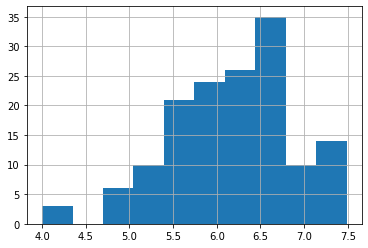

In [90]:
invest_covidPe['log_gastos'] = invest_covidPe['gastos'].apply(np.log10)
invest_covidPe[invest_covidPe['log_gastos'] > 0]['log_gastos'].hist()
invest_covidPe[(invest_covidPe['log_gastos'] > 0)].describe(include=['float64'])

> **Casos confirmados por populacao estimada do município**

In [91]:
covidPeCases['confirmados_por_populacao'] = covidPeCases['casos_confirmados']/covidPeCases['pop_estimada']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


> **Ajustando tipo e transformando valores para porcentagem a fim de facilitar a percepção das taxas para:**
  * *População estimad*a
  * *Taxa de mortalidade*
  * *Confirmados por população estimada*

In [93]:
covidPeCases['pop_estimada'] = covidPeCases['pop_estimada'].astype('int64')
covidPeCases['taxa_mortalidade'] = covidPeCases['taxa_mortalidade'] * 100
covidPeCases['confirmados_por_populacao'] = (covidPeCases['confirmados_por_populacao'] * 100).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

> **Distribuição dos dados para Confirmados por população**

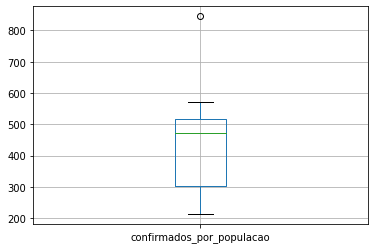

In [94]:
covidPeCases.boxplot(column=['confirmados_por_populacao'])

In [97]:
invest_covidPe = invest_covidPe.drop(columns={'outlier'})
invest_covidPe

,data_hora,tipo_favorecido,municipio,acao_orcamentaria,gastos,log_gastos
0,2020-03-10,1,8,1,60000.00,4.778151
1,2020-04-10,1,3,1,1174944.27,6.070017
2,2020-04-10,1,7,1,4130446.89,6.615997
3,2020-04-10,1,5,1,3830136.03,6.583214
4,2020-04-10,1,2,1,3662675.00,6.563798
...,...,...,...,...,...,...
695,2020-07-10,1,3,0,4995000.00,6.698535
696,2020-04-10,1,4,0,7327021.87,6.864927
697,2020-10-10,1,8,0,3500000.00,6.544068
698,2020-07-10,1,7,0,8676053.00,6.938322


> **Agregação de dados de repasse de verba do estado para cada município selecionado**

In [98]:
investimentoporcidade = invest_covidPe.groupby(by=['municipio']).sum()
investimentoporcidade

,tipo_favorecido,acao_orcamentaria,gastos,log_gastos
municipio,,,,
0,7,0,6.829944e+06,40.437225
1,6,0,3.126474e+06,31.889402
2,16,8,4.256069e+07,100.168306
3,18,9,2.882383e+07,106.487756
4,20,10,8.632559e+07,129.650840
5,20,10,3.668715e+07,119.699312
6,9,0,1.064331e+07,52.674185
7,20,10,1.127178e+08,120.995926
8,22,12,2.742621e+08,163.037351


> **Gastos em Saúde para cada Habitante**

In [99]:
covidPeCases['gastos'] = investimentoporcidade['gastos'].values
covidPeCases['gastos_por_habitante'] = (covidPeCases['gastos'] / covidPeCases['pop_estimada']).round(2)
covidPeCases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada,id,confirmados_por_populacao,gastos,gastos_por_habitante
id,,,,,,,,,
0,ARCOVERDE,4281,87,203.0,74822,0,572.0,6.829944e+06,91.28
1,BUÍQUE,1436,23,160.0,58919,1,244.0,3.126474e+06,53.06
2,CARUARU,17187,454,264.0,365278,2,471.0,4.256069e+07,116.52
3,GARANHUNS,7250,134,185.0,140577,3,516.0,2.882383e+07,205.04
4,JABOATÃO DOS GUARARAPES,19966,1095,548.0,706867,4,282.0,8.632559e+07,122.12
5,OLINDA,14581,635,435.0,393115,5,371.0,3.668715e+07,93.32
6,PAULISTA,7154,528,738.0,334376,6,214.0,1.064331e+07,31.83
7,PETROLINA,18239,209,115.0,354317,7,515.0,1.127178e+08,318.13
8,RECIFE,78117,3168,406.0,1653461,8,472.0,2.742621e+08,165.87


> **Discretização dos gastos por habitante** 

> *Nível de gastos* :
1. Muito baixo
2. Baixo
3. Médio
4. Alto 
5. Muito alto

In [100]:
print('intervalos', pd.cut(covidPeCases['gastos_por_habitante'].values,5).categories)
covidPeCases['nivel_de_gastos'] = pd.cut(covidPeCases['gastos_por_habitante'].values,5).codes + 1
covidPeCases

intervalos IntervalIndex([(31.544, 89.09], (89.09, 146.35], (146.35, 203.61], (203.61, 260.87], (260.87, 318.13]],
              closed='right',
              dtype='interval[float64]')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada,id,confirmados_por_populacao,gastos,gastos_por_habitante,nivel_de_gastos
id,,,,,,,,,,
0,ARCOVERDE,4281,87,203.0,74822,0,572.0,6.829944e+06,91.28,2
1,BUÍQUE,1436,23,160.0,58919,1,244.0,3.126474e+06,53.06,1
2,CARUARU,17187,454,264.0,365278,2,471.0,4.256069e+07,116.52,2
3,GARANHUNS,7250,134,185.0,140577,3,516.0,2.882383e+07,205.04,4
4,JABOATÃO DOS GUARARAPES,19966,1095,548.0,706867,4,282.0,8.632559e+07,122.12,2
5,OLINDA,14581,635,435.0,393115,5,371.0,3.668715e+07,93.32,2
6,PAULISTA,7154,528,738.0,334376,6,214.0,1.064331e+07,31.83,1
7,PETROLINA,18239,209,115.0,354317,7,515.0,1.127178e+08,318.13,5
8,RECIFE,78117,3168,406.0,1653461,8,472.0,2.742621e+08,165.87,3


#### **Testes de Hipótese** 

##### Teste de **Shapiro-Wilk** 
**Hipótese Nula**
> Os gastos em saúde é normalmente distribuído.

In [101]:
from scipy import stats
stats.shapiro(invest_covidPe['gastos'])

(0.6282327771186829, 7.681099079313296e-18)

##### **t-Test**
**Hipótese Nula**
> Os gastos em saúde é normalmente distribuído.

In [102]:
stats.ttest_rel(invest_covidPe['gastos'], invest_covidPe['log_gastos'])

Ttest_relResult(statistic=7.895696601726666, pvalue=5.975348886828321e-13)

> Em ambos os casos, os testes de hipótese com *```p-value```* abaixo do valor crítico evidenciam a possibilidade da hipótese nula ser contraditória.

> Os resultados então indicam que a distribuição de verba para a saúde durante o ano foi irregular.

##### **Teste de Mannwhitneyu** 
**Hipótese nula**
> As cidades que tiveram um nível de gastos de médio para muito alto (3,5) obtiveram níveis menores de mortalidade do que as cidades que investiram menos (1,2). Utilizaremos o valor crítico de 3%

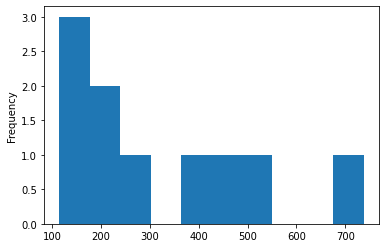

In [104]:
stats_desc_covid_PE = covidPeCases.filter(items=['municipio', 'gastos_por_habitante','taxa_mortalidade','nivel_de_gastos']).sort_values(by=['gastos_por_habitante'])
#Não segue uma normal
stats_desc_covid_PE['taxa_mortalidade'].plot.hist()

In [105]:
#Como nossos dados tratam de grupos não pareados e que não seguem uma distribuição normal, vamos utilizar o teste de mannwhitneyu
stats.mannwhitneyu(stats_desc_covid_PE[stats_desc_covid_PE['nivel_de_gastos'] <= 2]['taxa_mortalidade'],\
                   stats_desc_covid_PE[stats_desc_covid_PE['nivel_de_gastos'] >=3]['taxa_mortalidade'])

MannwhitneyuResult(statistic=4.0, pvalue=0.05490970440761861)

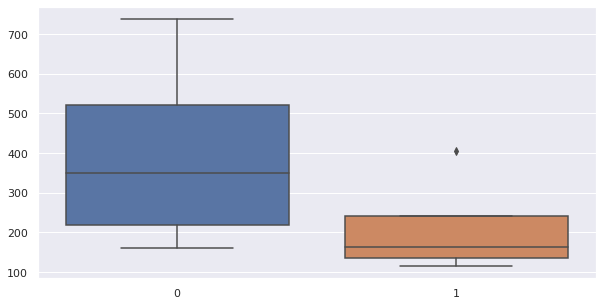

In [108]:
#O valor obtido pelo pvalue acima do valor crítico indica evidência forte a favor da hipótese
plt.figure(figsize=(10,5))

municipios12 = stats_desc_covid_PE[ stats_desc_covid_PE['nivel_de_gastos'] <= 2 ]
municipios35 = stats_desc_covid_PE[ stats_desc_covid_PE['nivel_de_gastos'] >= 3 ]

sns.boxplot(data=[municipios12[['taxa_mortalidade']], municipios35[['taxa_mortalidade']]])

##### **Visualizações**

> **A finalidade do gráfico abaixo é nos ajudar na validação da hipóteseve de que nas cidades onde houve menos investimento, a taxa de mortalidade consequentemente foi maior.**

[Text(0, 0.5, 'Taxa de Mortalidade'),
 Text(0.5, 0, 'Nível de Gastos'),
 Text(0.5, 1.0, 'Relação Nível de Gastos x Taxa de Mortalidade')]

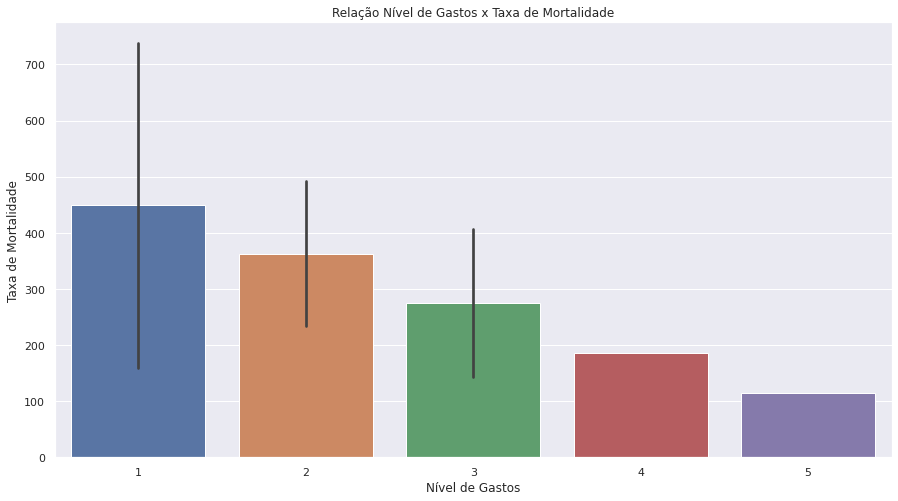

In [109]:
sns.set()
plt.figure(figsize=(15,8))
sns.barplot(x='nivel_de_gastos', y='taxa_mortalidade', data=covidPeCases).set(title='Relação Nível de Gastos x Taxa de Mortalidade', xlabel='Nível de Gastos', ylabel='Taxa de Mortalidade')

> **Análise do repasse mensal de verba para Saúde, por município**

In [116]:
dates = pd.date_range('10-Mar 2020','10-jan 2021',freq='M')

df = pd.DataFrame({'dates' : dates})
df['month_name'] = df['dates'].dt.strftime('%b')
df['gastos'] = invest_covidPe.groupby(by=['data_hora'])['gastos'].sum().values

# normalizando entre -1 e 1 para nos permitir verificar os meses em que tivemos o investimento menores dada a escala
df['gastos_norm'] = ((df['gastos'] - df['gastos'].min()) / (df['gastos'].max()-df['gastos'].min())*2)-1

#Aplicando log10 para visualizarmos em proporções parecidas
df['gastos_log10'] = df['gastos'].apply(np.log10)

> *Visualização*

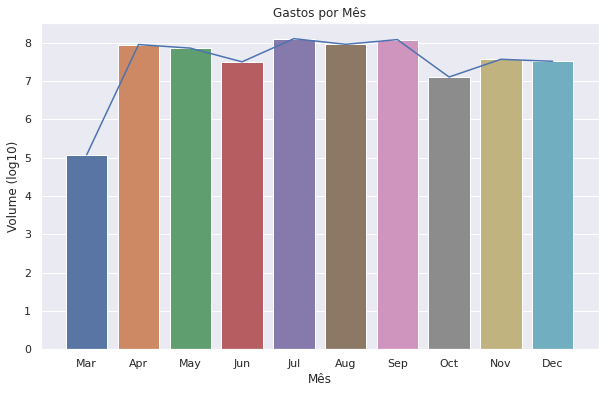

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(x='month_name', y='gastos_log10', data=df).set(title='Gastos por Mês', xlabel='Mês', ylabel='Volume (log10)')
sns.lineplot(x='month_name', y='gastos_log10', data=df)

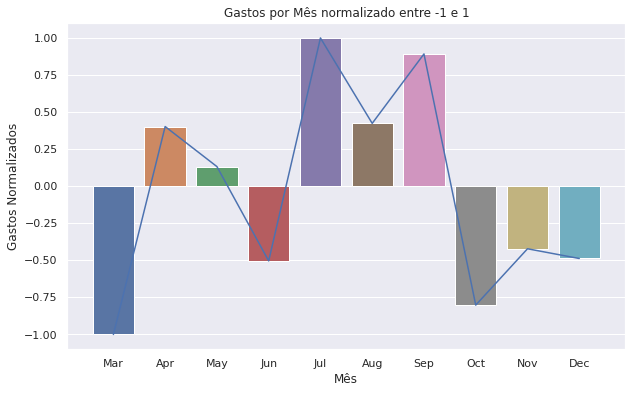

In [118]:
 #Visão com valores normalizados entre -1 e 1
plt.figure(figsize=(10,6))
sns.barplot(x='month_name', y='gastos_norm', data=df).set(title='Gastos por Mês normalizado entre -1 e 1', xlabel='Mês', ylabel='Gastos Normalizados')
sns.lineplot(x='month_name', y='gastos_norm', data=df)

> **Nível de Investimento por Município**

> Relembrando
> *Nível de gastos* :
1. Muito baixo
2. Baixo
3. Médio
4. Alto 
5. Muito alto

[Text(0, 0.5, 'Nível de Investimentos'),
 Text(0.5, 0, 'Município'),
 Text(0.5, 1.0, 'Nível de Investimentos por Município')]

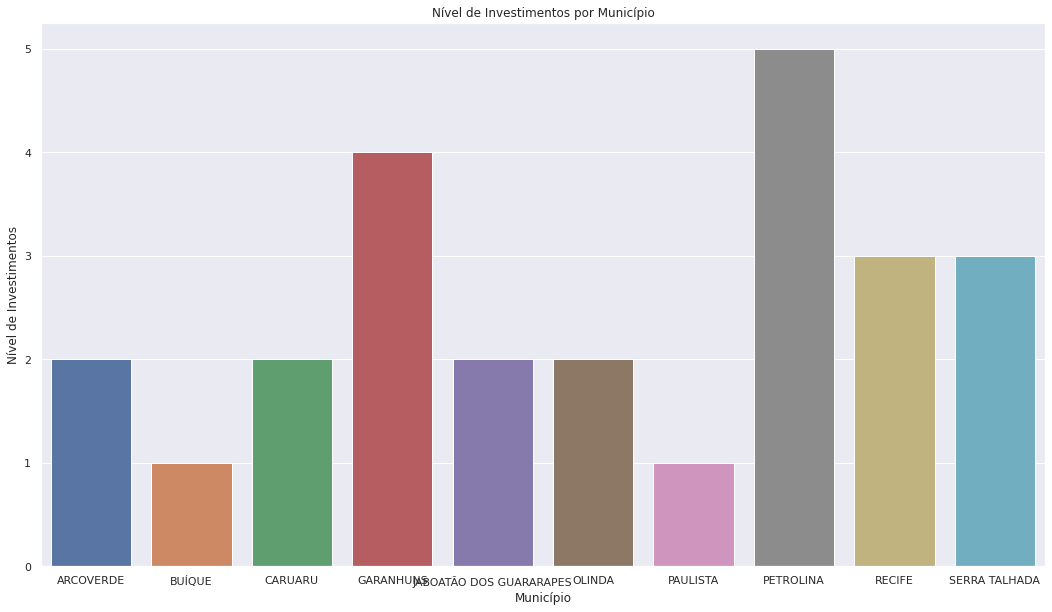

In [122]:
sns.set()
plt.figure(figsize=(18,10))

sns.barplot(x='municipio', y='nivel_de_gastos', data=stats_desc_covid_PE).set(title='Nível de Investimentos por Município', xlabel='Município', ylabel='Nível de Investimentos')

> **Taxa de Mortalidade por Município**

[Text(0, 0.5, 'Taxa de Mortalidade'),
 Text(0.5, 0, 'Município'),
 Text(0.5, 1.0, 'Taxa de mortalidade por Município')]

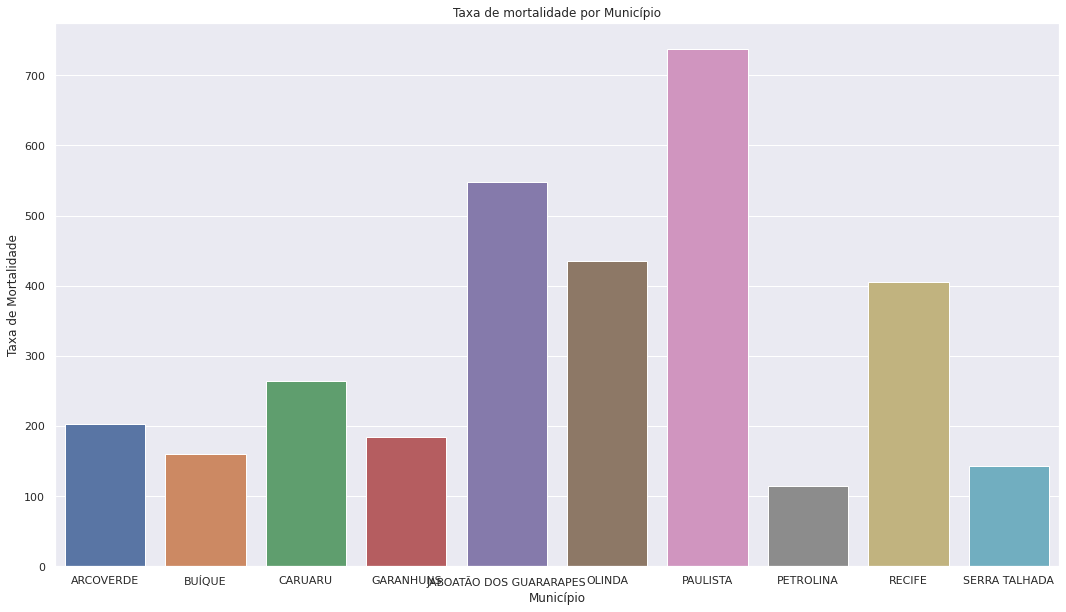

In [123]:
plt.figure(figsize=(18,10))
sns.barplot(x='municipio', y='taxa_mortalidade', data=stats_desc_covid_PE).set(title='Taxa de mortalidade por Município', xlabel='Município', ylabel='Taxa de Mortalidade')

#### **Correlações**

##### **Geral**

Tratamento dos dados

In [124]:
covidPeCases_corr = covidPeCases.drop(columns={'id', 'nivel_de_gastos'})
covidPeCases_corr = covidPeCases_corr.rename(columns={'casos_confirmados' : 'Casos Confirmados',
                                                      'mortes_confirmadas' : 'Mortes Confirmadas',
                                                      'taxa_mortalidade' : 'Taxa de Mortalidade',
                                                      'pop_estimada' : 'População',
                                                      'confirmados_por_populacao' : 'Confirmados por população',
                                                      'gastos' : 'Verba da Saúde',
                                                      'gastos_por_habitante' : 'Despesas por Habitante'                                                   
                                                      })

Visualização das correlações das estatísticas descritivas elaboradas para o problema em questão

Text(0.5, 1.0, 'Spearman')

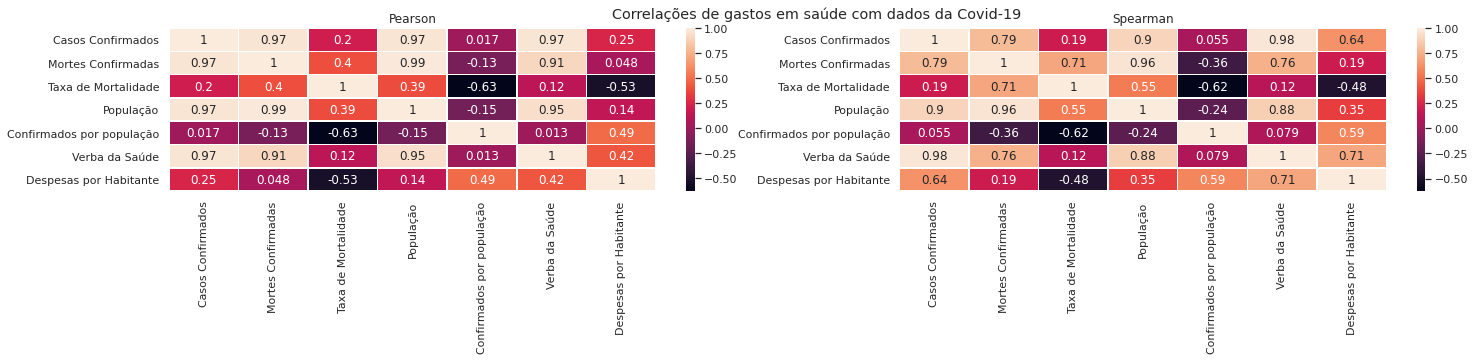

In [125]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=(24,3))
fig.suptitle('Correlações de gastos em saúde com dados da Covid-19')
sns.heatmap(covidPeCases_corr.corr(method='pearson'), annot=True, linewidths=.5, ax=ax0)
ax0.set_title('Pearson')
sns.heatmap(covidPeCases_corr.corr(method='spearman'), annot=True, linewidths=.5, ax=ax1)
ax1.set_title('Spearman')

##### **Correlação de gastos entre Caruaru e Paulista**
> Ambos possuem uma população estimada próxima, porém Paulista apresenta números muito piores que Caruaru.

Formatando período de visualização

In [158]:
dates = pd.date_range('10-Mar 2020','10-Sep 2020',freq='M')
dates.shape

(6,)

**Investimento por mês em Caruaru**

In [159]:
# Conversão de tipos
invest_covidPe['municipio'] = invest_covidPe['municipio'].astype('int64')
caruaru = covidPeCases[covidPeCases['municipio'] == 'CARUARU'].index.values.astype(int)[0]

# Definição temporal
InvestPerMonthCaruaru = pd.DataFrame({'dates' : dates})
InvestPerMonthCaruaru['month_name'] = InvestPerMonthCaruaru['dates'].dt.strftime('%b')

# Normalização da distribuição de gastos para Caruaru
spend_slice = invest_covidPe[invest_covidPe['municipio'] == caruaru].groupby(by=['data_hora'])['gastos'].sum().values
InvestPerMonthCaruaru['gastos'] = spend_slice[:-1]
InvestPerMonthCaruaru['gastos_log10'] = InvestPerMonthCaruaru['gastos'].apply(np.log10)

**Investimento por mês em Paulista**

In [161]:
#Conversão de tipos
paulista = covidPeCases[covidPeCases['municipio'] == 'PAULISTA'].index.values.astype(int)[0]

# Definição temporal
InvestPerMonthPaulista = pd.DataFrame({'dates' : dates})
InvestPerMonthPaulista['month_name'] = InvestPerMonthPaulista['dates'].dt.strftime('%b')

# Normalização da distribuição de gastos para Paulista
spend_slice = invest_covidPe[invest_covidPe['municipio'] == paulista].groupby(by=['data_hora'])['gastos'].sum().values
InvestPerMonthPaulista['gastos'] = spend_slice[:-2]
InvestPerMonthPaulista['gastos_log10'] = InvestPerMonthPaulista['gastos'].apply(np.log10)

**Visualização da comparação entre os dois Municípios**

[Text(0, 0.5, 'Gastos (Log10)'),
 Text(0.5, 0, 'Mês'),
 Text(0.5, 1.0, 'Paulista')]

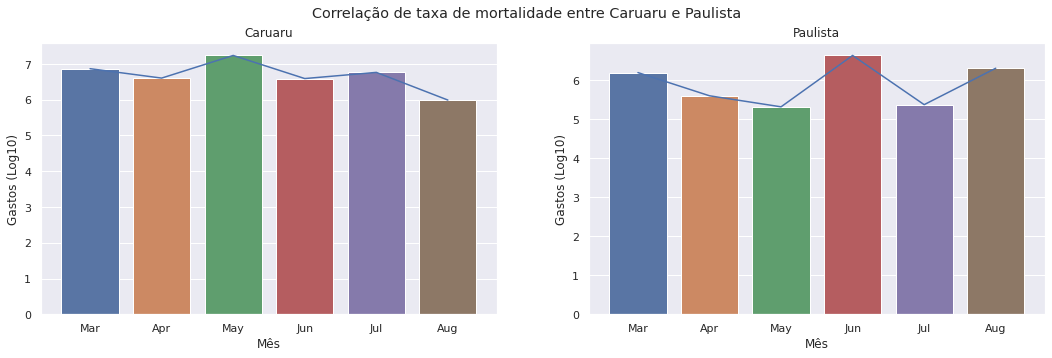

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))

fig.suptitle("Correlação de taxa de mortalidade entre Caruaru e Paulista")

sns.barplot(x='month_name', y='gastos_log10', data=InvestPerMonthCaruaru, ax=ax1).set(title='Caruaru', xlabel='Mês', ylabel='Gastos (Log10)')
sns.lineplot(x='month_name', y='gastos_log10', data=InvestPerMonthCaruaru, ax=ax1)

sns.barplot(x='month_name', y='gastos_log10', data=InvestPerMonthPaulista, ax=ax2)
sns.lineplot(x='month_name', y='gastos_log10', data=InvestPerMonthPaulista, ax=ax2).set(title='Paulista', xlabel='Mês', ylabel='Gastos (Log10)')

> Boxplot deixa clara a diferença de taxa de mortalidade para as duas cidades do estado com mesma população estimada porém com diferenças de repasse de verba para a saúde.

> Índices
0. Caruaru
1. Paulista

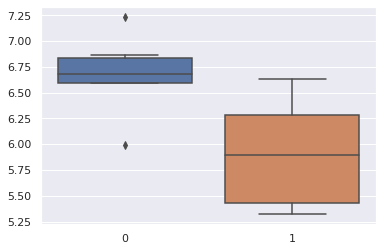

In [166]:
sns.boxplot(data=[InvestPerMonthCaruaru[['gastos_log10']], InvestPerMonthPaulista[['gastos_log10']]])

Os gastos com Paulista são muito menores que os gastos em Caruaru apesar de terem populações parecidas. Como já vimos anteriormente, os investimentos fizeram total diferença, pois apesar de terem uma quantidade de haitantes parecida, os níveis de taxa de mortalidade na cidade de Paulista são bem maiores

## Bônus: **Média móvel e Previsão de gastos para 2021**
  * Utilizaremos previsões em Séries Temporais
  * Recursos:
    - Pandas
    - Facebook Prophet

### **Conversão do Dataframe para trabalhar com distribuição temporal**
Conversão necessária para o desenvolvimento dos métodos de séries temporais

In [ ]:
# convert the 'Date' column to datetime format
invest_covidPe['data_hora'] = invest_covidPe['data_hora'].astype('datetime64[ns]')
invest_covidPe.set_index('data_hora')
invest_covidPe.index = pd.to_datetime(invest_covidPe['data_hora'])

# Check the format of 'Date' column
invest_covidPe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2020-03-10 to 2020-07-10
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data_hora          149 non-null    datetime64[ns]
 1   tipo_favorecido    149 non-null    int8          
 2   municipio          149 non-null    category      
 3   acao_orcamentaria  149 non-null    int8          
 4   gastos             149 non-null    float64       
 5   outlier            149 non-null    int64         
 6   log_gastos         149 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), int8(2)
memory usage: 6.6 KB


In [ ]:
invest_covidPe.drop({'data_hora'},axis=1,inplace=True)
invest_covidPe.head(3)

,tipo_favorecido,municipio,acao_orcamentaria,gastos,outlier,log_gastos
data_hora,,,,,,
2020-03-10,1,8,1,60000.00,-1,4.778151
2020-04-10,1,3,1,1174944.27,1,6.070017
2020-04-10,1,7,1,4130446.89,1,6.615997


### **Visualização dos gastos em todo o estado**

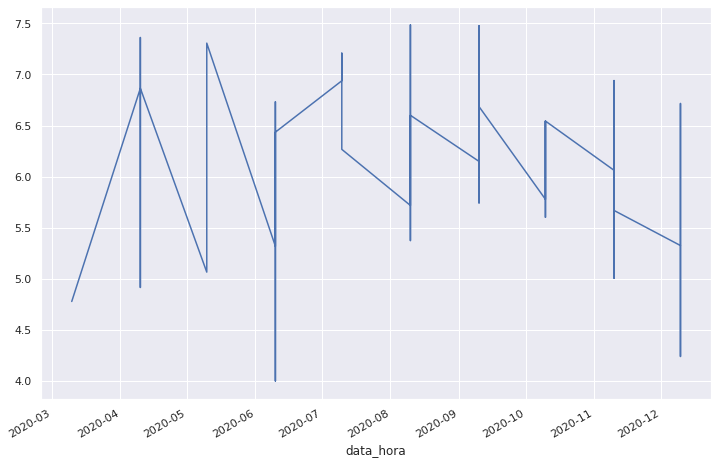

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(12, 8))
data = invest_covidPe.log_gastos
data.plot()

#### **Agregação de dados para visualização**

**Método**:
  * `resample`: *data aggregation*

**Amostragem**:
  * *Semanal* ('5D')
  * *Mensal* ('BM')
  * *Bimestre* ('91D')

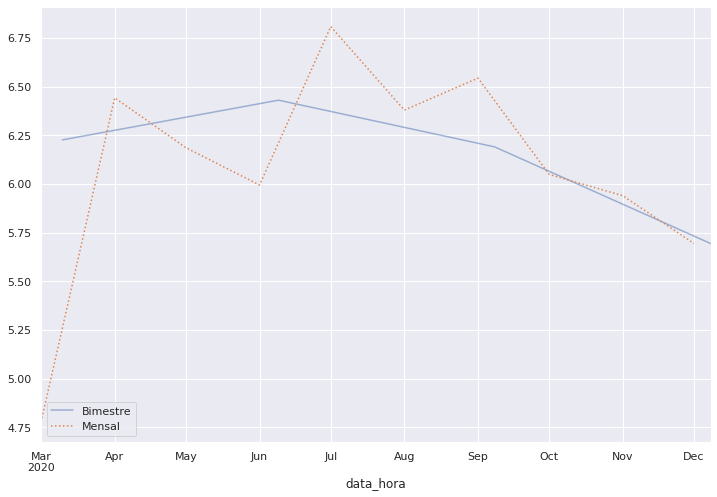

In [ ]:
plt.figure(figsize=(12, 8))
data.resample('91D').mean().plot(alpha=0.5, style='-')
data.resample('BM').mean().plot(style=':')
plt.legend(['Bimestre', 'Mensal'], loc='lower left');

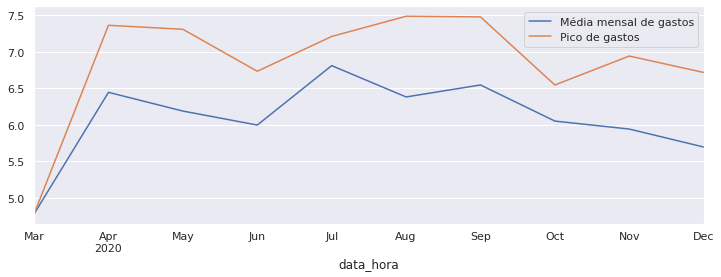

In [ ]:
plt.figure(figsize=(12, 4))
data.resample('BM').mean().plot(label='Média mensal de gastos')
data.resample('BM').max().plot(label='Pico de gastos')
plt.legend()

### Janela deslizante

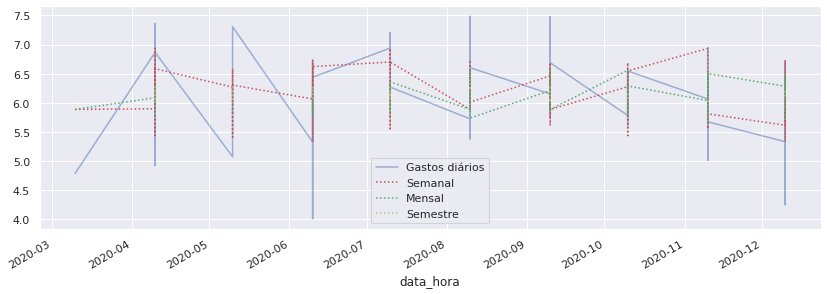

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(211)
data.rolling(1).median().plot(label='Gastos diários' , alpha=.5)
(data.rolling(5)
 .median()
 .plot(label="Semanal", style='r:', alpha=1)
)
(data.rolling(30)
 .median()
 .plot(label="Mensal", style='g:', alpha=1)
)
(data.rolling(91)
 .median()
 .plot(label="Bimestre", style='y:', alpha=1)
)
plt.legend()

#### Previsões com Prophet

> Realizaremos previsões de gastos semanal, mensal e anual em relação ao estado de pernambuco com o agravamento da covid-19

> O conjunto histórico se dará com o todo o conjunto de dados de Março/2020 até Dezembro/2020

A intenção é avaliar se a previsão corresponde com os meses já passados de 2021 e com os próximos meses até o final do ano.

In [ ]:
!pip install --quiet fbprophet

Para avaliação do melhor resultado para remoção de outliers, serão utilizados 
cópias dos dataframes gerados

In [ ]:
from fbprophet import Prophet

prophet_df = data.reset_index()
prophet_df.columns = ["ds", "y"]
prophet_df.tail()

,ds,y
144,2020-07-10,6.698535
145,2020-04-10,6.864927
146,2020-10-10,6.544068
147,2020-07-10,6.938322
148,2020-07-10,6.267172


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


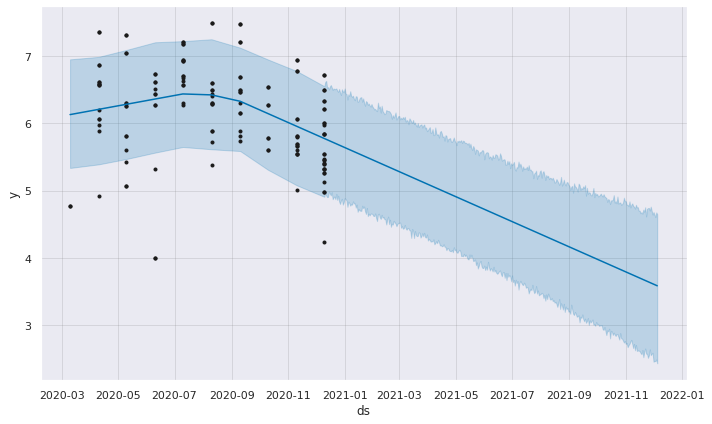

In [ ]:
m = Prophet()
m.fit(prophet_df)
pred = m.predict(m.make_future_dataframe(periods=360))
m.plot(pred); # weird bug causes to plot twice, put ; in the end

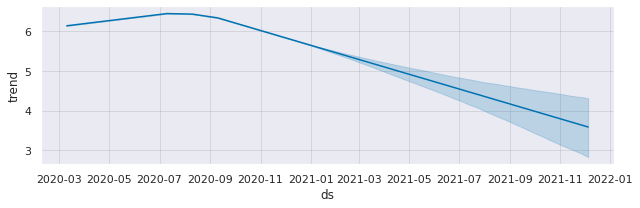

In [ ]:
m.plot_components(pred);

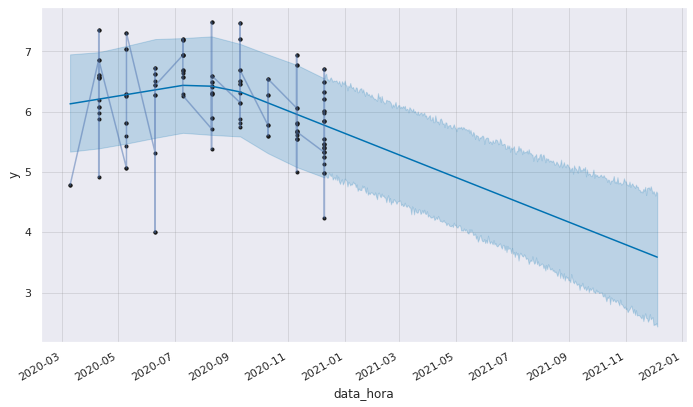

In [ ]:
m.plot(pred); # weird bug causes to plot twice, put ; in the end
data.plot(label='Gastos (em milhões)', alpha=.5)